## **1.	Outliers**

### **1.9.	Outlier Visualization, Detection and Removal**

#### **Step 1: Select Appropriate Libraries**

In [9]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load the dataset from github (RAW link)
df = pd.read_csv("https://raw.githubusercontent.com/tabassumgulfaraz-ds/machine_learning_1.0/main/files_and_datasets/f_ds5_III/outlier_dataset.csv")

# check the shape i.e. number of rows and columns also called dimensions of the dataset
print(f"Dataset Shape: {df.shape}")

df

Dataset Shape: (30, 5)


,Age,Income,Height,Weight,Score
0,25,45000,165,68,85
1,30,52000,170,72,78
2,28,48000,168,70,82
3,35,65000,175,80,90
4,22,38000,160,55,75
5,27,50000,172,75,88
6,32,58000,178,82,92
7,29,51000,169,71,80
8,26,47000,166,67,83
9,31,55000,174,78,87


#### **Step 2: Choose Your Visualization Method**

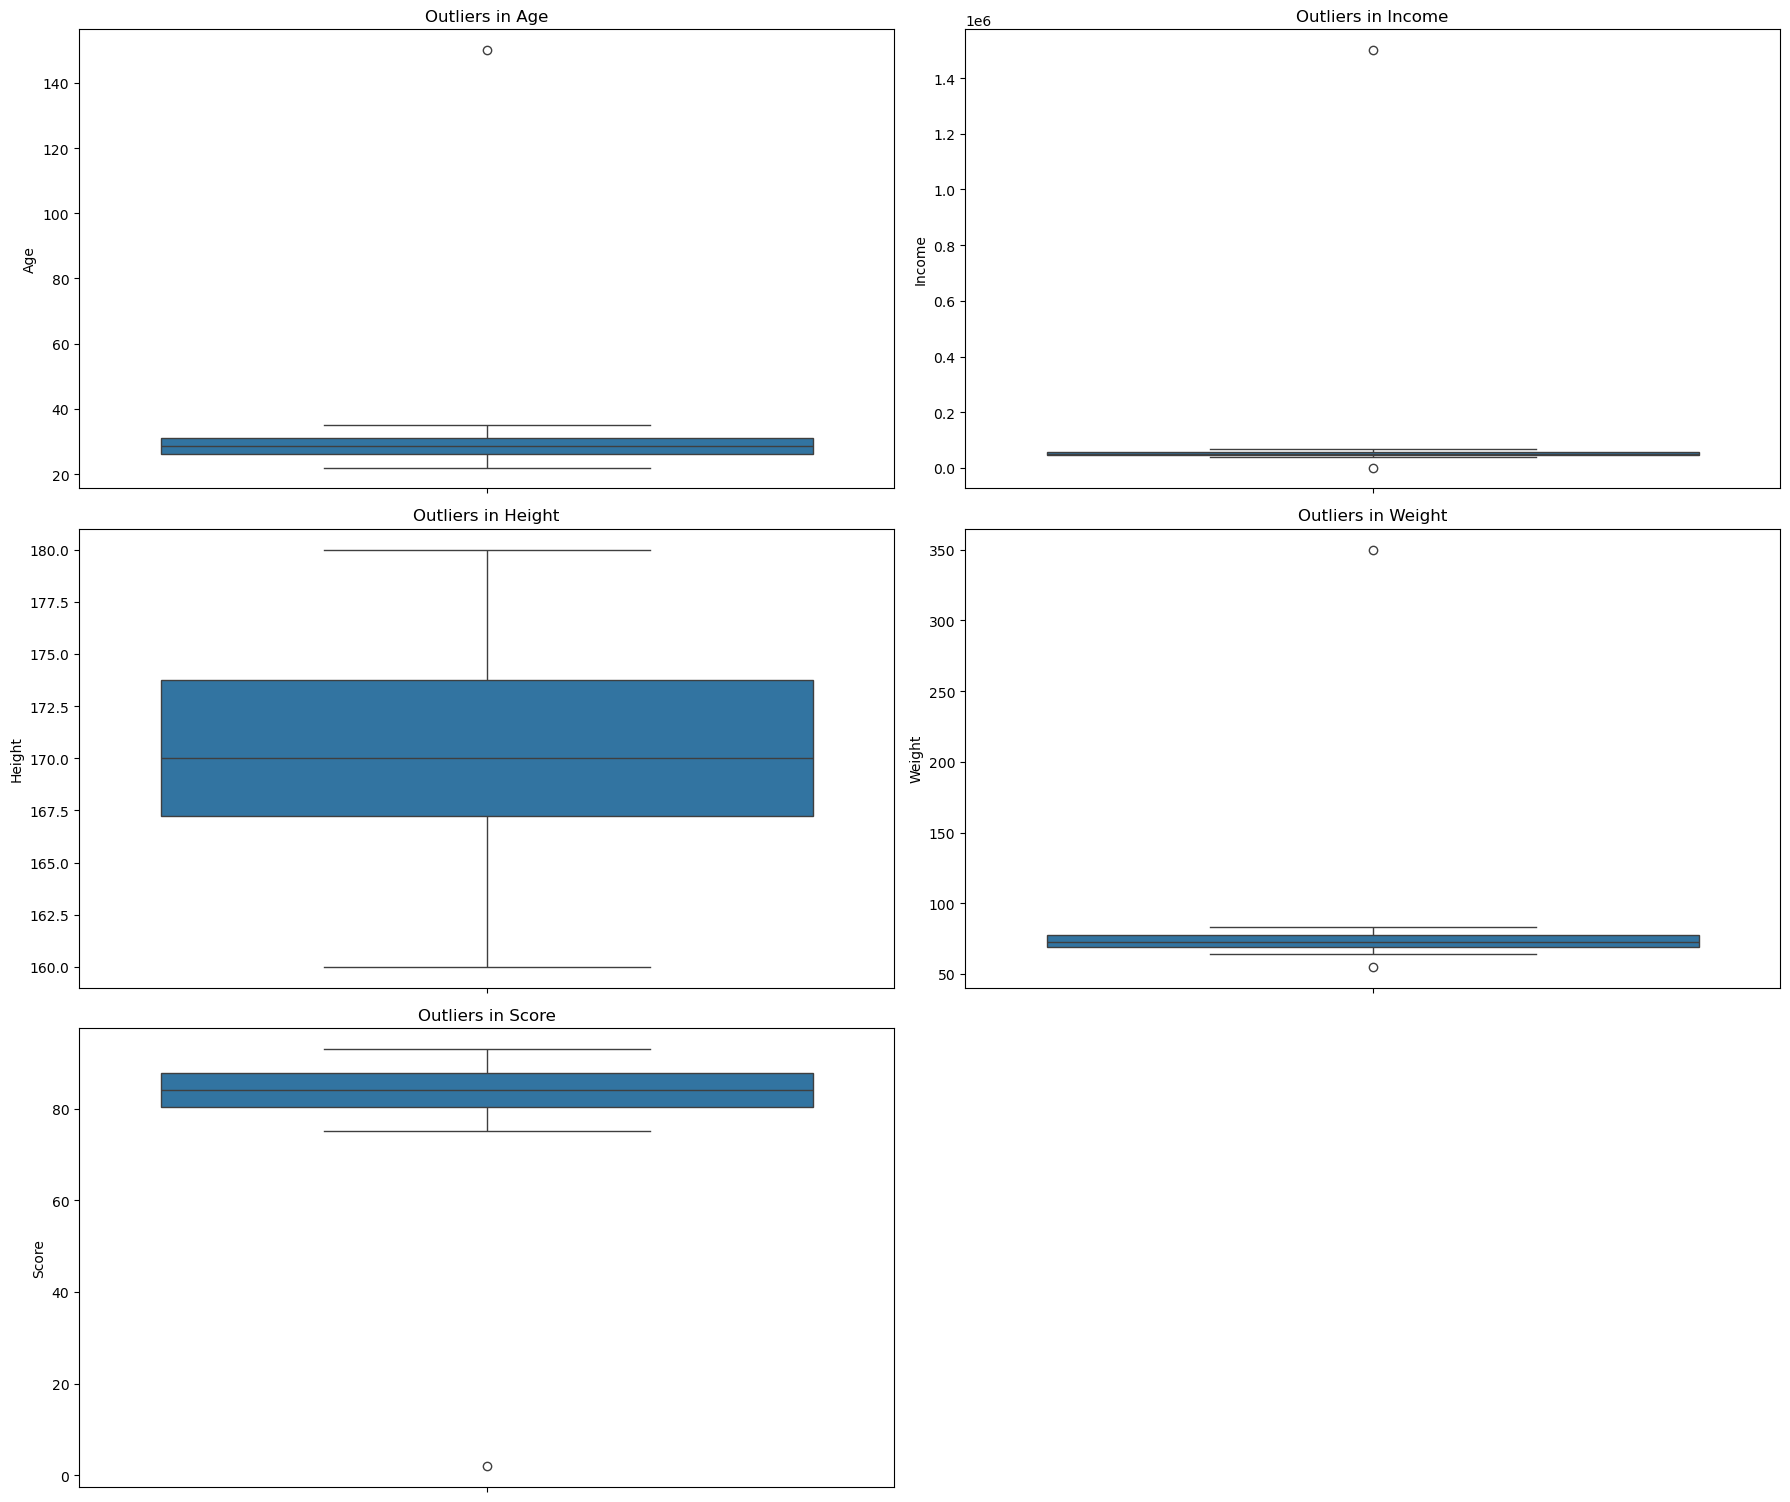

In [2]:
# Select numeric columns
df.select_dtypes(include=[np.number]).columns

# Set up subplot grid
n_cols = 2   # number of plots per row
n_rows = int(np.ceil(len(df) / n_cols))

plt.figure(figsize=(18, 5 * n_rows))

for i, col in enumerate(df, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(y=df[col])
    plt.title(f'Outliers in {col}')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


#### **Step 3: Apply Detection Method**

**1. IQR**  
**2. Z-Score**  
**3. K-Means Clustering**  
**4. Isolation Forest**  
**5. DBSCAN**  
**6. Local Outlier Factor**  
**7. Elliptic Envelope**  
**8. One-Class SVM**  
**9. Mahala-Nobis Distance**  
**10. Robust Random Cut Forest**  
**11. Histogram-based Outlier Score**  
**12. K-Nearest Neighbors**  
**13. Local Correlation Integral**   
**14. and many more…**

In [ ]:
# Select numeric columns only
numeric_df = df.select_dtypes(include=[np.number])

# Create empty boolean mask
outlier_mask = pd.DataFrame(False, index=df.index, columns=numeric_df.columns)

# Apply IQR column-wise
for col in numeric_df.columns:
    Q1 = numeric_df[col].quantile(0.25)
    Q3 = numeric_df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outlier_mask[col] = (numeric_df[col] < lower) | (numeric_df[col] > upper) 

# Detect rows where ANY column has outlier
df[outlier_mask.any(axis=1)]

,Age,Income,Height,Weight,Score
4,22,38000,160,55,75
10,150,60000,171,73,86
14,30,1500000,173,77,91
22,35,67000,180,350,90
25,24,1200,165,64,78
28,33,63000,176,82,2


#### **Step 4: Validate and Document**

In [4]:
# Store detected outliers from Step 3
outliers = df[outlier_mask.any(axis=1)]

# Total number of outlier rows
len(outliers)       # 6

6

In [5]:
# Percentage of dataset flagged as outlier
{round((len(outliers)/len(df))*100, 2)}     # {20.0}

{20.0}

In [6]:
# Column-wise outlier count
outlier_mask.sum()

Age       1
Income    2
Height    0
Weight    2
Score     1
dtype: int64

In [7]:
# Display detected outlier rows
outliers

,Age,Income,Height,Weight,Score
4,22,38000,160,55,75
10,150,60000,171,73,86
14,30,1500000,173,77,91
22,35,67000,180,350,90
25,24,1200,165,64,78
28,33,63000,176,82,2


#### **Step 5: Apply Removal Method**

In [ ]:
# In this step, we deal with outliers present in the dataset. Outliers can negatively impact model performance, especially for algorithms sensitive to extreme values (e.g., linear regression, k-means).

# There are multiple ways to handle outliers:

#    1. Remove outlier rows completely
#    If the outliers are due to data entry errors or are not meaningful, we can remove those rows from the dataset.

#    2. Cap or Winsorize values
#    Replace extreme values with upper and lower threshold limits (e.g., using IQR or percentile method).

#    3. Transform the data
#    Apply transformations such as log, square root, or Box-Cox to reduce the impact of extreme values.

#    4. Use robust models or scaling techniques
#    Some algorithms (e.g., tree-based models) and robust scalers are less sensitive to outliers.

#### **Summary:**
**Your dataset contains outliers that are:**<br></br>
✅ Univariate Outliers (single variable)  
✅ Point Outliers (individual extreme points)  
✅ Global Outliers (abnormal in entire dataset)  